# Introduction to Neural Network with Tensorflow

## There are three types of classification
1. Binary Classification - Find out yes or no type questions
2. Multiclass Classification - Each image has one label - Finding out if the image is food, dog, cat
3. Multilabel Classification - Each image may have more than one labels

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Number of samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

> This data is hard to read so first visualize the data

In [3]:
# Visualizing using a Data Frame
circles = pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "label": y
})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


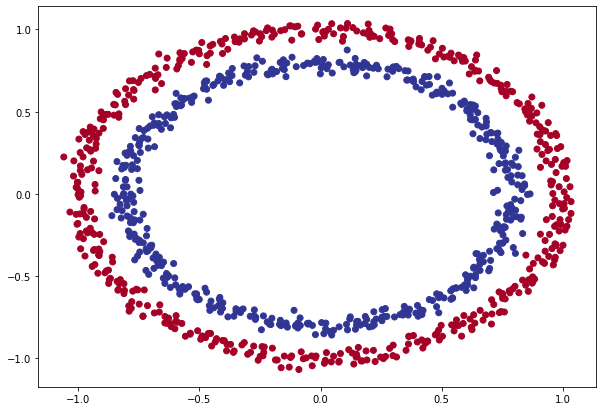

In [4]:
# Visualize this using a plot

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# Input and Output shapes

In [5]:
# Check the shape of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# Find the number of entries
len(X), len(y)

(1000, 1000)

In [7]:
# View the first samples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in Modeling

In [8]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

# Compile a model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [9]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

## Since its only 50% accuracy, we need to improve our model
- Add another layer to the model


In [10]:
# Set the radom seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [11]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

> Its still the same

# Improving our model

1. Create a model - Add layers or add hidden units
2. Compile a model - Choose a different optimization function
3. Fitting a model - more epochs

In [12]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [13]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

# Plot the decision boundary
1. Create X min, X max, y min and y max
2. Create meshgrid
3. Make predictions across the meshgrid
4. Plot the predictions as well as a line between zones

In [14]:
# Visualize with plot function
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print("Doing multiclass Classification")
    # reshape predictions
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max());


Doing binary classification


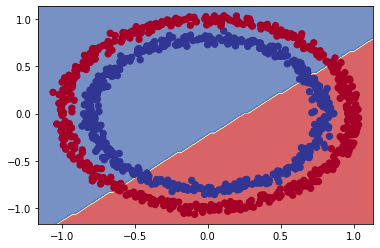

In [15]:
plot_decision_boundary(model=model_3, X=X, y=y)

In [16]:
# Lets see if our model can be used for a regression problem
tf.random.set_seed(42)

# Creating the regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split the data into training and test set
X_reg_train, X_reg_test = X_regression[:150], X_regression[150:]
y_reg_train, y_reg_test = y_regression[:150], y_regression[150:]

# Fit our model 3 for this regression problem
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

ValueError: ignored

# Create a model for regression

In [17]:
# set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_4.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100, verbose=0)

In [18]:
# make predictions
y_reg_preds = model_4.predict(X_reg_test)

In [19]:
X_reg_train.shape, y_reg_train.shape

(TensorShape([150]), TensorShape([150]))

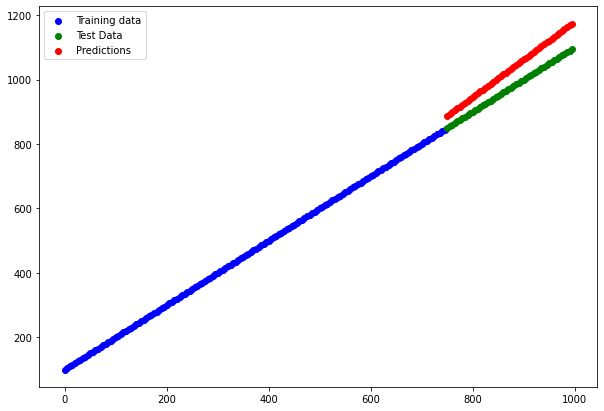

In [20]:
# plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece - non linearity

In [21]:
tf.random.set_seed(42)

# create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fitting the model
history = model_5.fit(X, y, epochs=100, verbose=0)

Doing binary classification


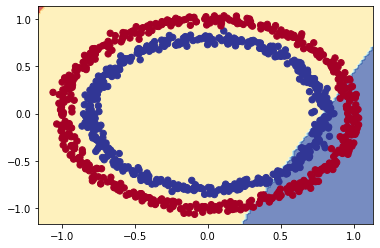

In [22]:
# Check the decision boundary
plot_decision_boundary(model=model_5, X=X, y=y)

# Lets build our neural network with non linear activation function

In [23]:
# set the random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
model_6.fit(X, y, epochs=100, verbose=0)

In [24]:
# Replicate the multilayer neural network from Tensorflow playground

# set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit
history = model_7.fit(X, y, epochs=250, verbose=0)

> This also performed with 50% accuracy

Doing binary classification


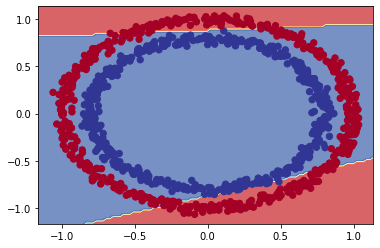

In [25]:
plot_decision_boundary(model_7, X, y)

## Last model for binary classification

In [26]:
# set the seed
tf.random.set_seed(42)

# create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit
model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [27]:
# Evaluate
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Doing binary classification


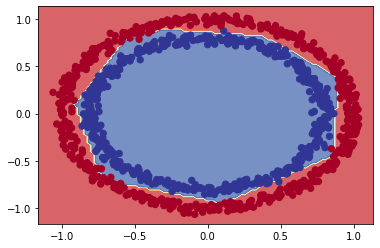

In [28]:
# plot
plot_decision_boundary(model_8, X, y)

**NOTE**
> The combination of linear (straight lines) and non-linear(non-straight lines) is one of the key fundamentals of Neural Network

## Create sigmoid relu and linear functions from scratch

In [29]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [30]:
# Create a sigmoid function sig(x) = 1/1+exp(-x)
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

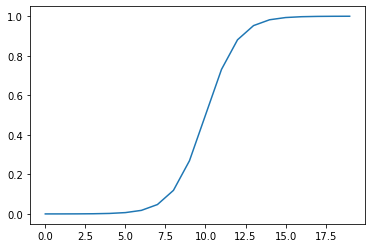

In [31]:
plt.plot(sigmoid(A));

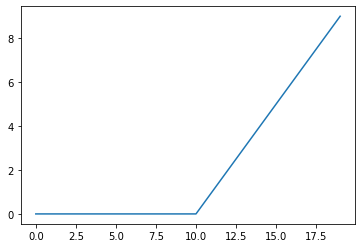

In [32]:
# Create a relu function relu(x) = max(x, 0)
def relu(x):
  return tf.maximum(x, 0)

plt.plot(relu(A));

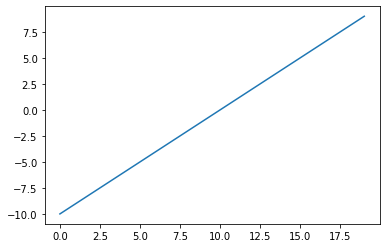

In [33]:
# Create a linear function
def linear(x):
  return X

plt.plot(A);

# Evaluating and improving our classification model

In [34]:
# Split the data into training and test set
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [35]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model
history = model_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [36]:
# Evaluate the model
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

Doing binary classification
Doing binary classification


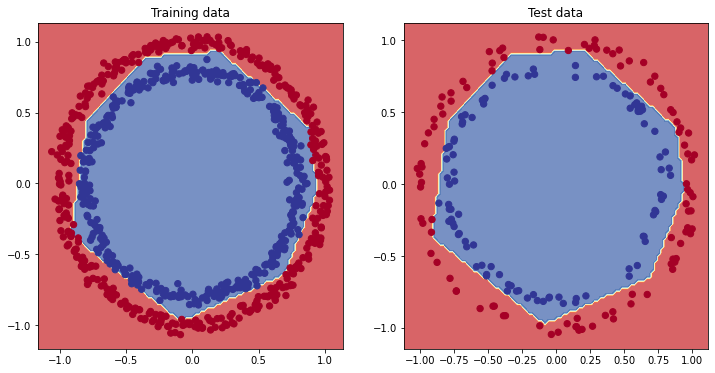

In [37]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(
    model=model_9,
    X=X_train,
    y=y_train
)
plt.subplot(1, 2, 2)
plt.title("Test data")
plot_decision_boundary(
    model=model_9,
    X=X_test,
    y=y_test
)
plt.show()

# Plotting the loss curve

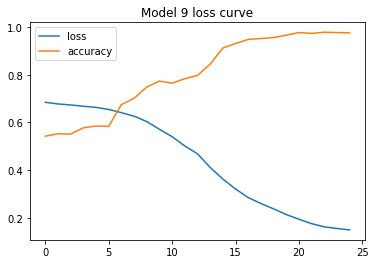

In [38]:
pd.DataFrame(history.history).plot()
plt.title("Model 9 loss curve");

**Note**
> For many problems, the loss function going down means model is improving

# Finding the ideal learning rate
To find the ideal learning rate we are going to use following steps

- **learning rate callback**
- Another model
- modified loss curves plot 

In [39]:
# set the random set seed
tf.random.set_seed(42)

# create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_10.compile(loss="binary_crossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

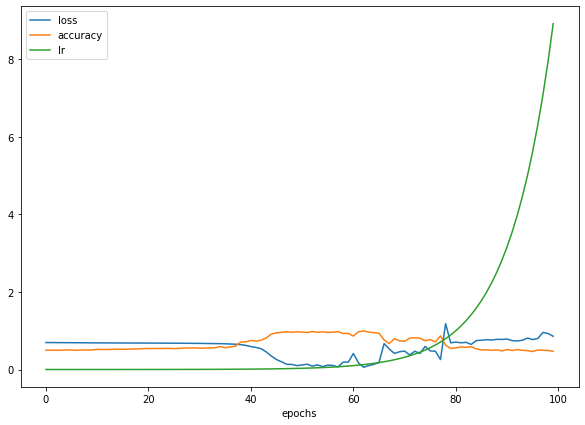

In [40]:
pd.DataFrame(history_10.history).plot(figsize=(10,7), xlabel="epochs");

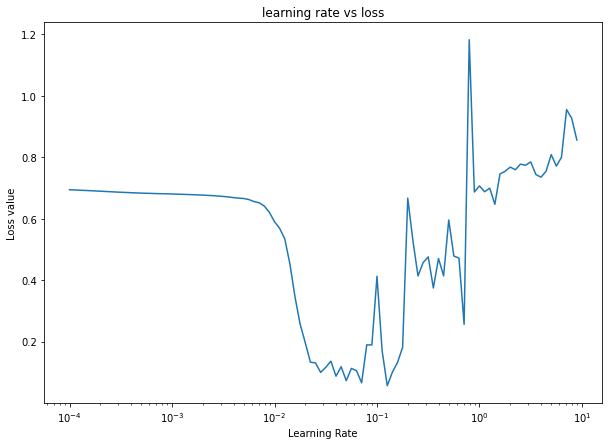

In [41]:
# Plot the learning rate versus the loss values
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss value")
plt.title("learning rate vs loss");

> Don't go for minimum but choose value where it gets minimum and stays minimum - in this case 10-2 to 10-1

## More classification evaluation methods

Other classification evaluation methods are as follows:
1. Accuracy Score
2. Precision - High Precision leads to less false positives
3. Recall - High Recall leads to less false negatives
4. F1 Score
5. Confusion matrix
6. Classification report (from scikit learn)

In [55]:
# Check the accuracy
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model Accuracy: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.9850
Model loss on the test set: 0.296130895614624
Model Accuracy: 98.50%


# Create a confusion matrix

In [57]:
from sklearn.metrics import confusion_matrix
y_preds = model_8.predict(X_test)

In [45]:
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [58]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

In [59]:
y_preds

array([[0.7040661 ],
       [0.86104524],
       [0.69367194],
       [0.7619505 ],
       [0.3316767 ],
       [0.22865927],
       [0.6628142 ],
       [0.23215601],
       [0.82175446],
       [0.3966621 ],
       [0.78037083],
       [0.6362948 ],
       [0.91778445],
       [0.70072514],
       [0.7406511 ],
       [0.7302049 ],
       [0.6098547 ],
       [0.7234681 ],
       [0.12558249],
       [0.68644875],
       [0.1864109 ],
       [0.70511675],
       [0.67915267],
       [0.85086226],
       [0.3120741 ],
       [0.6264926 ],
       [0.7423966 ],
       [0.15572828],
       [0.26122454],
       [0.7588265 ],
       [0.21421531],
       [0.6340358 ],
       [0.7131108 ],
       [0.0954437 ],
       [0.2609599 ],
       [0.6590236 ],
       [0.7976325 ],
       [0.53665584],
       [0.8578322 ],
       [0.79893595],
       [0.79946923],
       [0.59501904],
       [0.8693665 ],
       [0.04616755],
       [0.82638776],
       [0.63303065],
       [0.65765405],
       [0.148

> As you can see y_preds returns the probabilities, convert it into integers

In [60]:
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 1, 98]])

* There are 99 true negatives
* 98 true positives
* 1 false negative
* 2 false positive


# Create a custom confusion matrix plot

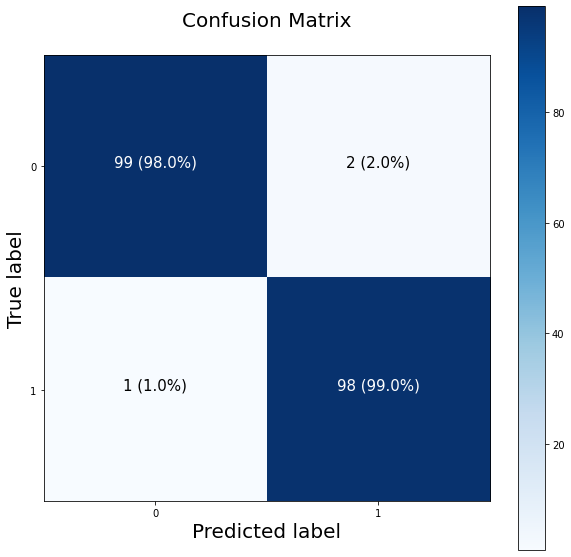

In [67]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)